### Access an open source dataset “Titanic”. Apply pre-processing techniques on the raw dataset.

### Data covers passengers only, not crew.
### Features
### survived - Survival (0 = No; 1 = Yes)
### class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
### name - Name
### sex - Sex
### age - Age
### sibsp - Number of Siblings/Spouses Aboard
### parch - Number of Parents/Children Aboard
### ticket - Ticket Number
### fare - Passenger Fare
### cabin - Cabin
### embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./dataset-23-titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop(labels=["Name",'Ticket','Cabin'], axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.shape

(891, 9)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
age_med = df['Age'].median()
age_med

28.0

In [9]:
df['Age'].fillna(age_med,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
df.shape

(889, 9)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [15]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [16]:
pd.crosstab(df["Sex"],df.Survived)

Survived,0,1
Sex,,
female,81,231
male,468,109


Text(0, 0.5, 'Survival Probability')

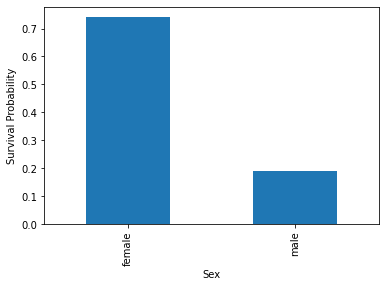

In [17]:
plt = df[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

In [18]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['AgeRange'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange
0,1,0,3,male,22.0,1,0,7.2500,S,20-29
1,2,1,1,female,38.0,1,0,71.2833,C,30-39
2,3,1,3,female,26.0,0,0,7.9250,S,20-29
3,4,1,1,female,35.0,1,0,53.1000,S,30-39
4,5,0,3,male,35.0,0,0,8.0500,S,30-39


In [20]:
df.AgeRange.value_counts()

20-29    407
0-19     179
30-39    154
40-49     86
50-59     42
60-69     16
70-79      5
80+        0
Name: AgeRange, dtype: int64

In [21]:
pd.crosstab(df["AgeRange"],df.Survived)

Survived,0,1
AgeRange,,
0-19,97,82
20-29,271,136
30-39,86,68
40-49,53,33
50-59,25,17
60-69,13,3
70-79,4,1


Text(0, 0.5, 'Survival Probability')

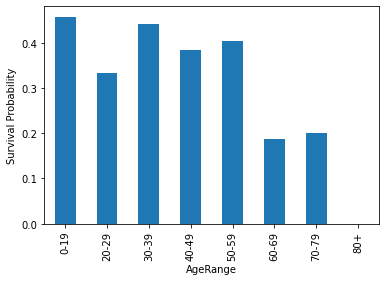

In [22]:
plt = df[['AgeRange', 'Survived']].groupby('AgeRange').mean().Survived.plot(kind='bar')
plt.set_xlabel('AgeRange')
plt.set_ylabel('Survival Probability')

In [23]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [24]:
pd.crosstab(df["Pclass"],df.Survived)

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


Text(0, 0.5, 'Survival Probability')

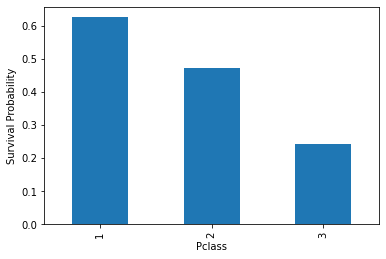

In [25]:
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [26]:
gender = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(gender)

In [27]:
ports = {"S": 0, "C": 1, "Q": 2}
df['Embarked'] = df['Embarked'].map(ports)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange
0,1,0,3,0,22.0,1,0,7.2500,0,20-29
1,2,1,1,1,38.0,1,0,71.2833,1,30-39
2,3,1,3,1,26.0,0,0,7.9250,0,20-29
3,4,1,1,1,35.0,1,0,53.1000,0,30-39
4,5,0,3,0,35.0,0,0,8.0500,0,30-39


In [29]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.031319,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.069822,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.336512,0.081656,0.016824,-0.548193,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.086506,0.116348,0.247508,0.179958,0.118593
Age,0.031319,-0.069822,-0.336512,-0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.007165
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.171485,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,0.179958,0.093707,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


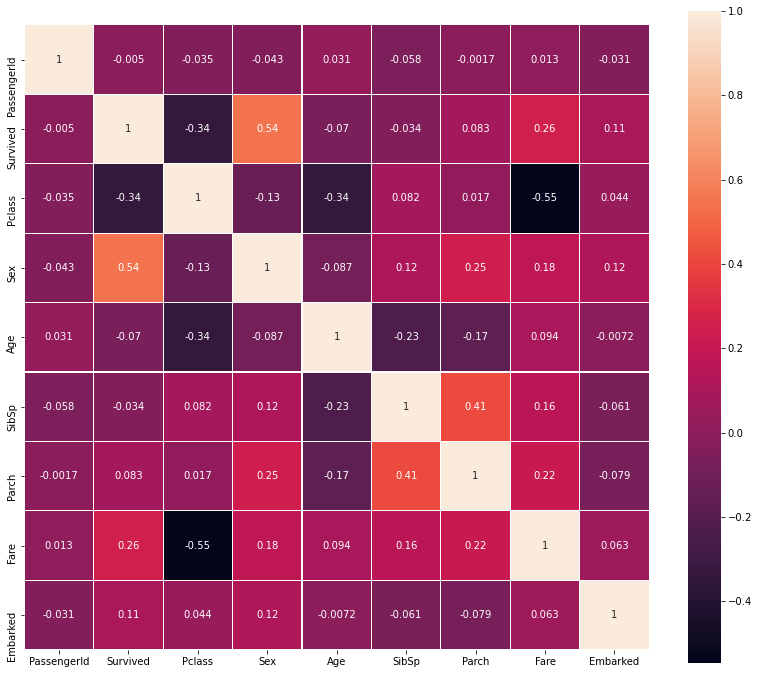

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
df=df.drop(['AgeRange'],axis=1)
sns.heatmap(df.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()